## Slab Waveguide

In [66]:
import matplotlib.pyplot as plt
from IPython.display import Video
import meep as mp

mp.verbosity(0);  # 0: minimal output; 1: a little; 2: a lot; 3: debugging

In [ ]:
wavelength = 1.31  # Wavelength in µm
n_Si = 3.50685     # 3.50685 (1.31 µm) | 3.47638 (1.55 µm) 
n_SiO2 = 1.44672   # 1.44672 (1.31 µm) | 1.44400 (1.55 µm)
t_Si = 0.22        # Thickness in µm
t_pml = 1.0        # PML (perfectly matched layer 吸收層) thickness in µm
resolution = 50    # pixels/µm
fcen = 1/wavelength

In [73]:
## Geometry
geometry = [mp.Block(mp.Vector3(mp.inf, t_Si, mp.inf),
                     center = mp.Vector3(),  # if no input, default to zeros
                     material = mp.Medium(index=n_Si))]
## Simulation Domain
lx = int(2*wavelength*10)/10
ly = int(5*t_Si*10)/10
sx = lx + 2*t_pml
sy = ly + 2*t_pml
cell_size = mp.Vector3(sx, sy)

## Light Source
## 一般光源(空間) 穩定態(時間)
# sources = [mp.Source(mp.ContinuousSource(frequency=fcen, fwidth=0.1*fcen),
#                      component=mp.Ez, center=mp.Vector3(-lx/2, 0), size=mp.Vector3(0, t_Si))]
## 模態光源(空間) 穩定態(時間)
# sources = [mp.EigenModeSource(mp.ContinuousSource(frequency=fcen, fwidth=0.1*fcen),
#                               center=mp.Vector3(-lx/2, 0), size=mp.Vector3(0, ly), eig_band=1, eig_parity=mp.EVEN_Y+mp.ODD_Z)]
## 一般光源(空間) 高斯瞬態(時間)
# sources = [mp.Source(mp.GaussianSource(frequency=fcen, fwidth=0.1*fcen),
#                      component=mp.Ez, center=mp.Vector3(-lx/2, 0), size=mp.Vector3(0, t_Si))]
## 模態光源(空間) 高斯瞬態(時間)
sources = [mp.EigenModeSource(mp.GaussianSource(frequency=fcen, fwidth=0.1*fcen),
                              center = mp.Vector3(-lx/2, 0), size = mp.Vector3(0, ly),
                              eig_match_freq = True,  # Default True, try to find a mode with the same frequency as the src property
                              eig_band = 1,  # Integer or DiffractedPlaneWave class, default 1, index of the desired band where 1 denotes the lowest-frequency band at a given k point
                              # eig_parity = mp.EVEN_Y+mp.ODD_Z)]  # TE mode (Ez,Hx,Hy)
                              eig_parity = mp.ODD_Y+mp.EVEN_Z)]  # TM mode (Hz,Ex,Ey)
## Simulation Object
sim = mp.Simulation(geometry = geometry,
                    cell_size = mp.Vector3(sx, sy),
                    boundary_layers = [mp.PML(t_pml)],
                    sources = sources,
                    resolution = resolution,
                    default_material = mp.Medium(index=n_SiO2))

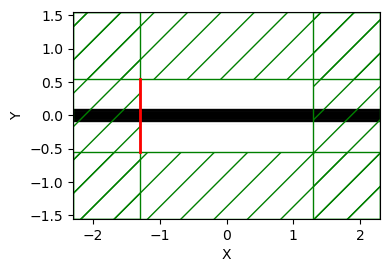

In [74]:
fig, ax = plt.subplots(figsize=(4,3))
sim.plot2D(ax=ax)
fig.tight_layout()

In [77]:
sim.reset_meep()  # Restart time for field propagation
## For continuous light source
sim.run(until=100)
## For transient light source
# sim.run(until_after_sources=mp.stop_when_fields_decayed(10, mp.Ez, mp.Vector3(0,0), 1e-6))
## stop_when_fields_decayed(dt, component, location, decay_by)
## keep incrementing runtime by dt

FloatProgress(value=0.0, description='0% done ')

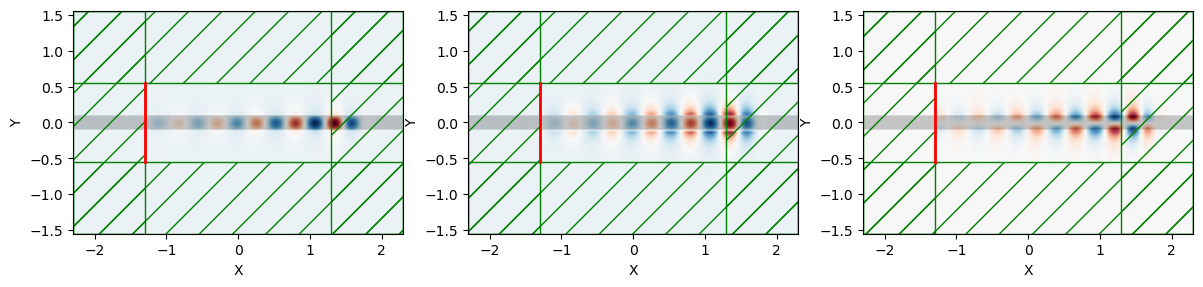

In [78]:
## Note that sim.plot2D plots fields at the end of simulation (should decay to zero for transient light source)
## Fields can also be obtained by sim.get_array(component=mp.Ez)
fig, axs = plt.subplots(1,3, figsize=(12,4))
## TE mode
# sim.plot2D(fields=mp.Ez, ax=axs[0])
# sim.plot2D(fields=mp.Hy, ax=axs[1])
# sim.plot2D(fields=mp.Hx, ax=axs[2])
## TM mode
sim.plot2D(fields=mp.Hz, ax=axs[0])
sim.plot2D(fields=mp.Ey, ax=axs[1])
sim.plot2D(fields=mp.Ex, ax=axs[2])
fig.tight_layout()

In [ ]:
sim.reset_meep()  # Restart time for field propagation
side_view = mp.simulation.Volume(center=mp.Vector3(), size=mp.Vector3(lx,ly))

fig = plt.figure(figsize=(4,3), dpi=150)
fig.subplots_adjust(left=0.2)
# Animate = mp.Animate2D(fields=mp.Ez, f=fig, realtime=False, normalize=True, output_plane=side_view)
Animate = mp.Animate2D(fields=mp.Ey, f=fig, realtime=False, normalize=True, output_plane=side_view)
sim.run(mp.at_every(1, Animate), until=120)
plt.close()

fps = 10  # Frames per second
# filename = "./wg_slab_TE_Ez.mp4"
filename = "./wg_slab_TM_Ey.mp4"
Animate.to_mp4(fps, filename)
Video(filename)

FloatProgress(value=0.0, description='0% done ', max=120.0)

In [80]:
## Steady-state light source
sources = [mp.EigenModeSource(mp.ContinuousSource(frequency=fcen, fwidth=0.1*fcen),
                              center=mp.Vector3(-lx/2, 0), size=mp.Vector3(0, ly), eig_band=1,
                              # eig_parity=mp.EVEN_Y+mp.ODD_Z)]  # TE mode (Ez,Hy,Hx)
                              eig_parity=mp.ODD_Y+mp.EVEN_Z)]  # TM mode (Hz,Ey,Ex)
## Simulation object
sim = mp.Simulation(geometry = geometry,
                    cell_size = mp.Vector3(sx, sy),
                    boundary_layers = [mp.PML(t_pml)],
                    sources = sources,
                    resolution = resolution,
                    default_material = mp.Medium(index=n_SiO2))
sim.reset_meep()
sim.run(until=100)

FloatProgress(value=0.0, description='0% done ')

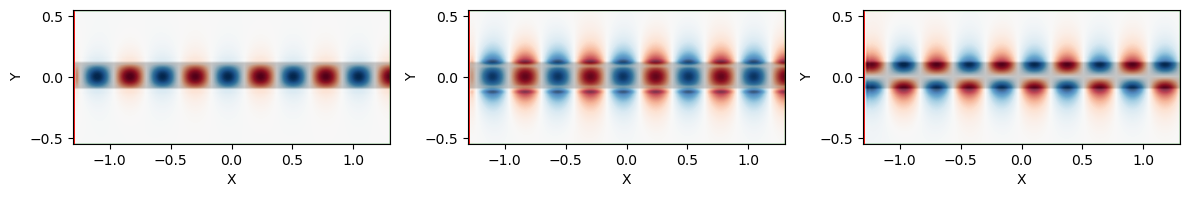

In [82]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))
## Plot TE mode
# sim.plot2D(fields=mp.Ez, ax=axs[0], output_plane=side_view)
# sim.plot2D(fields=mp.Hy, ax=axs[1], output_plane=side_view)
# sim.plot2D(fields=mp.Hx, ax=axs[2], output_plane=side_view)
## Plot TM mode
sim.plot2D(fields=mp.Hz, ax=axs[0], output_plane=side_view)
sim.plot2D(fields=mp.Ey, ax=axs[1], output_plane=side_view)
sim.plot2D(fields=mp.Ex, ax=axs[2], output_plane=side_view)
fig.tight_layout()